# Convolutional Neural Networks prediction on MINST dataset

In [1]:
# import packages 
import keras
from keras.models import Sequential, Input, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D

Using TensorFlow backend.


In [2]:
# Load the MNIST data
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [7]:
# Convert to 28*28*1 and normalize to [0, 1]
x_train_new = x_train.reshape(x_train.shape[0], 28, 28, 1) / 255
x_test_new = x_test.reshape(x_test.shape[0], 28, 28, 1) / 255

In [8]:
# Transform the categorical output label into 10 binary output labels
y_train_new = keras.utils.to_categorical(y_train, 10)
y_test_new = keras.utils.to_categorical(y_test, 10)

In [9]:
model = Sequential()
# Input layer and convolution layer (with 32 different filters/kernels, each filter/kernel is 5*5 dimension)
model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten()) # fully connected
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 592,074
Trainable params: 592,074
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Then we can compile the model with appropriate loss function, optimizer and metrics 
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [11]:
# Train the model with 15 epochs and batches of 128 images
history = model.fit(x_train_new, y_train_new, epochs=15, batch_size=128, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 44s 911us/step - loss: 0.2625 - acc: 0.9243 - val_loss: 0.0928 - val_acc: 0.9739
Epoch 2/15
48000/48000 [==============================] - 43s 891us/step - loss: 0.0801 - acc: 0.9761 - val_loss: 0.0661 - val_acc: 0.9798
Epoch 3/15
48000/48000 [==============================] - 43s 889us/step - loss: 0.0587 - acc: 0.9824 - val_loss: 0.0527 - val_acc: 0.9837
Epoch 4/15
48000/48000 [==============================] - 44s 910us/step - loss: 0.0460 - acc: 0.9856 - val_loss: 0.0474 - val_acc: 0.9853
Epoch 5/15
48000/48000 [==============================] - 45s 944us/step - loss: 0.0351 - acc: 0.9886 - val_loss: 0.0510 - val_acc: 0.9857
Epoch 6/15
48000/48000 [==============================] - 45s 933us/step - loss: 0.0317 - acc: 0.9902 - val_loss: 0.0522 - val_acc: 0.9858
Epoch 7/15
48000/48000 [==============================] - 45s 927us/step - loss: 0.0256 - acc: 0.9916 - val_loss: 0.

In [12]:
# Evaluate model performance on test data
loss_and_metrics = model.evaluate(x_test_new, y_test_new, batch_size=128)
loss_and_metrics #[loss, accuracy]

10000/10000 [==============================] - 3s 280us/step


[0.044292381505254524, 0.9877]

In [13]:
# Make predictions on test data
probabilities = model.predict(x_test_new, batch_size=128)
classes = probabilities.argmax(axis=-1)
classes

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

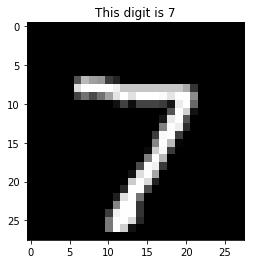

In [15]:
# What does the first image in x_test_new look like
# Whether we predict it correctly?
from __future__ import division
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.imshow(np.array(x_test_new[0,:]).reshape((28, 28)), cmap="gray")
plt.title("This digit is %d" % classes[0])
plt.show()

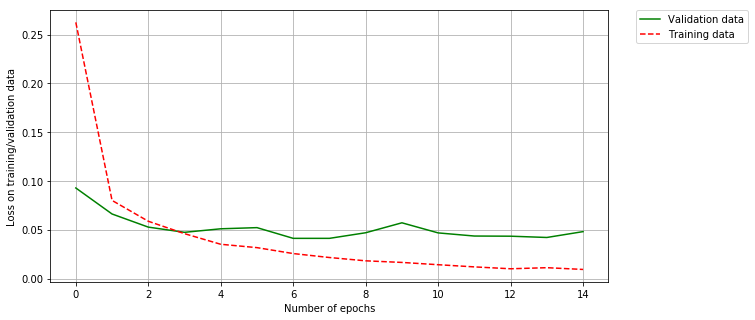

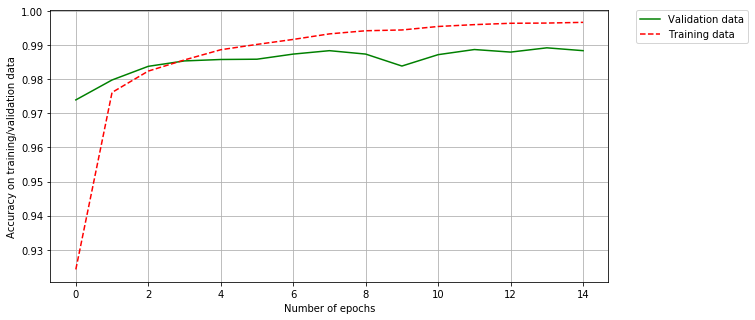

In [16]:
# Plot loss and accuracy 
fig = plt.figure(figsize=(10,5))

#plt.subplot(1, 2, 1)
plt.plot(history.epoch, history.history['val_loss'], 'g-', label='Validation data')
plt.plot(history.epoch, history.history['loss'], 'r--', label='Training data')
plt.grid(True)
plt.xlabel('Number of epochs')
plt.ylabel('Loss on training/validation data')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#plt.subplot(1, 2, 2)
fig = plt.figure(figsize=(10,5))
plt.plot(history.epoch, history.history['val_acc'], 'g-', label='Validation data')
plt.plot(history.epoch, history.history['acc'], 'r--', label='Training data')
plt.grid(True)
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy on training/validation data')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [17]:
# Classification Report
# References: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
from sklearn.metrics import classification_report
target_names = ["Number {}".format(i) for i in range(10)]
print(classification_report(y_test, classes, target_names=target_names))

              precision    recall  f1-score   support

    Number 0       0.99      0.99      0.99       980
    Number 1       0.99      1.00      0.99      1135
    Number 2       0.98      1.00      0.99      1032
    Number 3       0.98      0.99      0.99      1010
    Number 4       0.99      0.99      0.99       982
    Number 5       0.98      0.99      0.99       892
    Number 6       0.99      0.98      0.99       958
    Number 7       0.99      0.99      0.99      1028
    Number 8       0.99      0.98      0.98       974
    Number 9       0.99      0.97      0.98      1009

   micro avg       0.99      0.99      0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

